<a href="https://colab.research.google.com/github/Ucchwas/Image-Classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

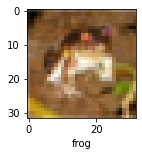

In [ ]:
plot_sample(x_train,y_train,0)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics='accuracy')
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.8156 - accuracy: 0.3524
Epoch 2/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.6232 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5446 - accuracy: 0.4539
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4818 - accuracy: 0.4788
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4301 - accuracy: 0.4942


In [ ]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.4629 - accuracy: 0.4767


[1.4629215002059937, 0.4767000079154968]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification report : \n', classification_report(y_test,y_pred_classes))

Classification report : 
               precision    recall  f1-score   support

           0       0.54      0.58      0.56      1000
           1       0.68      0.47      0.56      1000
           2       0.34      0.41      0.37      1000
           3       0.33      0.41      0.36      1000
           4       0.46      0.30      0.36      1000
           5       0.49      0.21      0.30      1000
           6       0.40      0.75      0.52      1000
           7       0.61      0.49      0.54      1000
           8       0.74      0.50      0.59      1000
           9       0.48      0.65      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),    

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),               
    
    layers.Flatten(),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])


In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics='accuracy')

In [ ]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.3461 - accuracy: 0.5190
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9955 - accuracy: 0.6504
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8092 - accuracy: 0.7169
Epoch 4/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6665 - accuracy: 0.7678
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.5251 - accuracy: 0.8177
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.3956 - accuracy: 0.8631
Epoch 7/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.2746 - accuracy: 0.9049
Epoch 8/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.1921 - accuracy: 0.9338
Epoch 9/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.1354 - accuracy: 0.9545
Epoch 10/10
1563/1563 [==============================] - 51s 33m

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.5233 - accuracy: 0.6991


[1.523302674293518, 0.6991000175476074]

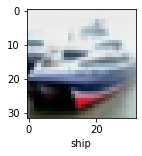

In [ ]:
y_test = y_test.reshape(-1,)
plot_sample(x_test,y_test,1)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[3.3212019e-10, 2.4553461e-04, 7.7264362e-05, 9.9713469e-01,
        6.6309399e-06, 1.4158996e-03, 1.1090712e-03, 1.0679512e-05,
        1.9183616e-07, 1.1111841e-11],
       [6.8999879e-04, 7.8494847e-02, 2.5699258e-12, 2.0995766e-13,
        8.9197579e-17, 3.8749250e-14, 1.3305017e-15, 3.0103379e-18,
        9.2081386e-01, 1.3401901e-06],
       [4.3506672e-05, 4.4590766e-03, 6.2400563e-06, 3.8632785e-04,
        1.5218620e-04, 1.2469232e-07, 5.2551496e-08, 6.6304933e-06,
        9.9444652e-01, 4.9929071e-04],
       [9.5272321e-01, 1.0209317e-05, 1.7445924e-02, 3.9146540e-05,
        2.9748462e-02, 1.9413531e-09, 9.0446373e-11, 2.4728868e-08,
        3.2921336e-05, 1.4603530e-07],
       [1.4558717e-12, 1.2739777e-06, 5.0797702e-05, 1.8624724e-03,
        9.9505371e-01, 3.5750872e-07, 3.0312999e-03, 5.4831586e-12,
        6.4513699e-08, 4.2923011e-13]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 4, 6, 1, 2, 3, 1]

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

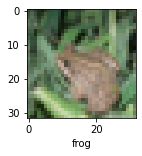

In [ ]:
plot_sample(x_test,y_test,4)

In [ ]:
classes[y_classes[4]]

'deer'

In [ ]:
print('Classification report : \n', classification_report(y_test,y_classes))

Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      1000
           1       0.78      0.87      0.82      1000
           2       0.58      0.62      0.60      1000
           3       0.48      0.55      0.52      1000
           4       0.68      0.63      0.66      1000
           5       0.58      0.60      0.59      1000
           6       0.85      0.74      0.79      1000
           7       0.72      0.75      0.73      1000
           8       0.81      0.78      0.80      1000
           9       0.81      0.73      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

